In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
# Adding Artificial Noise
# Random Noise from Standard Normal Distribution (loc or avg = 0 && scale or SD = 1)
noise = 0.5
x_train_noisy = X_train + noise * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
x_test_noisy = X_test + noise * np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1,)
x_test_noisy = np.clip(x_test_noisy, 0., 1,)

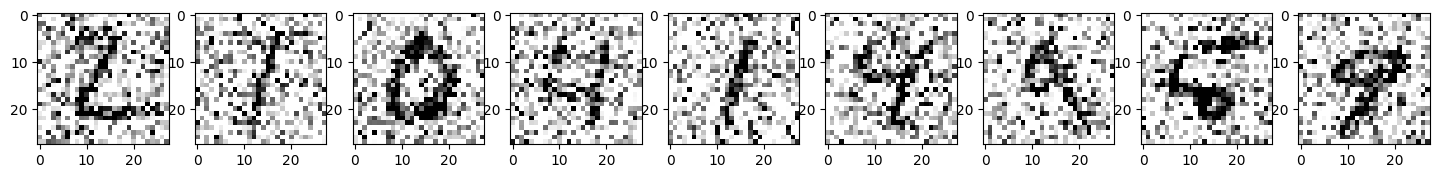

In [ ]:
plt.figure(figsize = (20, 2))
for i in range(1, 10):
  ax = plt.subplot(1, 10, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28), cmap = "binary")
plt.show()

In [ ]:
SIZE = 28

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

model.fit(x_train_noisy, X_train, epochs=10, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy, X_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_115 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_116 (Conv2D)         (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_117 (Conv2D)         (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 4, 4, 8)         

In [ ]:
model.evaluate(x_test_noisy, X_test)

model.save('denoising_autoencoder.model')

313/313 [==============================] - 6s 20ms/step - loss: 0.0216


313/313 [==============================] - 4s 13ms/step


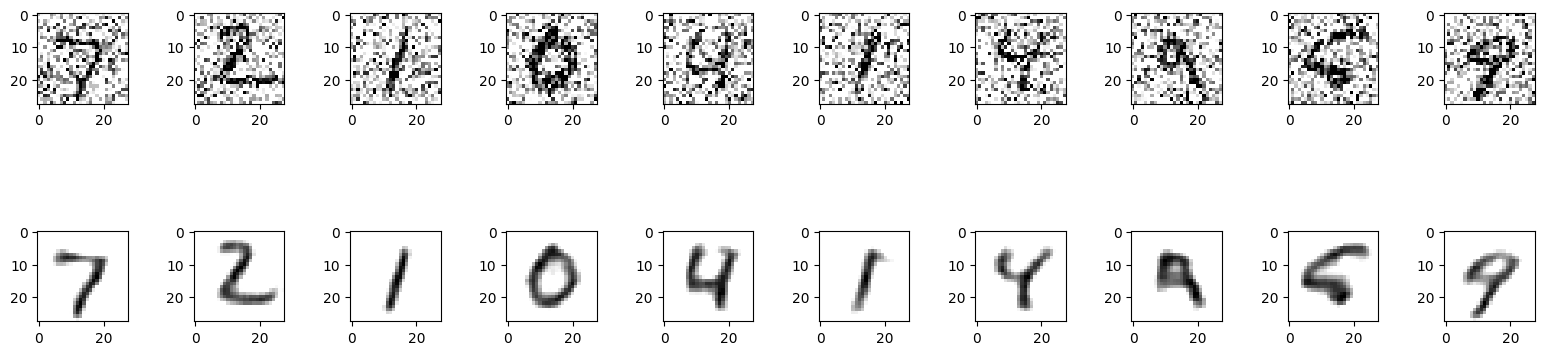

In [ ]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")

    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()